# Local approximation models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lam import ar, fft, ssa
from ensemble import Ensemble

In [2]:
data = pd.read_csv('data_sample.csv')
x = data['gravity.x'].values
y = data['gravity.y'].values
z = data['gravity.z'].values
print(x.shape)

(1333,)


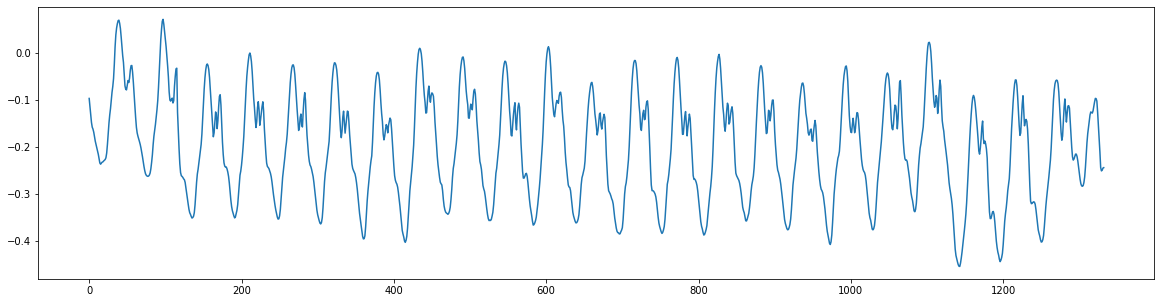

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(x)
plt.show()

<hr>

In [4]:
ens = Ensemble([ar.AR(3),
                ar.ARMA(2, 1),
                fft.FFT(4),
                ssa.SSA(10)])

names = ['AR', 'ARMA', 'FFT', 'SSA']

In [6]:
[model.name for model in ens.models]

['ar_3', 'arma_2_1', 'fft_4', 'ssa_10']

In [5]:
ens.fit(np.vstack([x, y, z]))

/home/danillich/.local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarn

/home/danillich/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


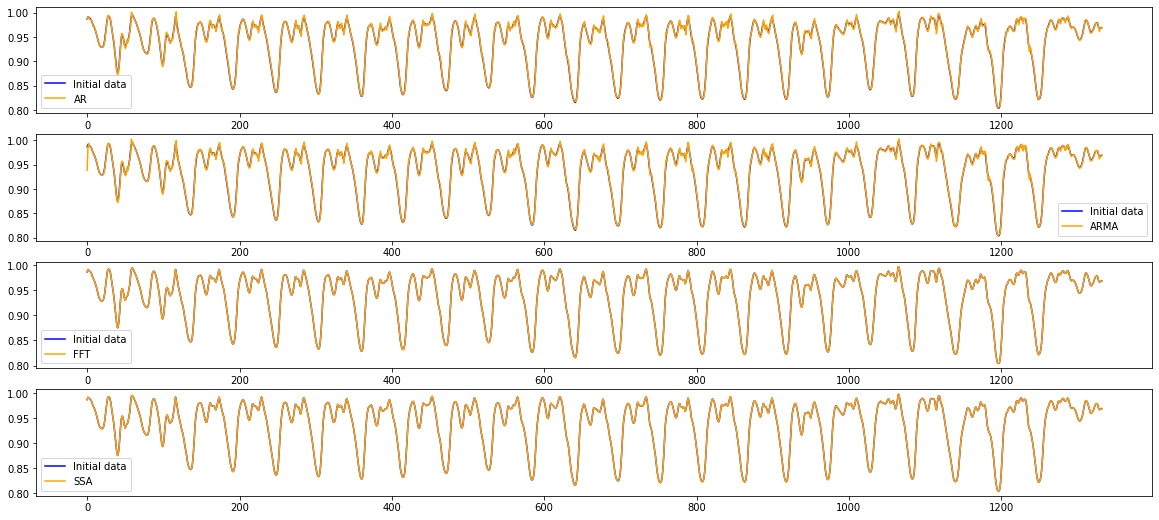

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 9))
for i in range(4):
    ax[i].plot(y, c='b', label='Initial data')
    ax[i].plot(ens.models[i]._preds[1], c='orange', label=names[i])
    ax[i].legend(loc='best')
plt.show()

In [13]:
print(ens.params.shape)
print(ens.params[0])
print(ens.models_indices)

(3, 22)
[-3.41281115e-03  2.10052595e+00 -1.45076553e+00  3.33194938e-01
 -1.98584419e-01  1.69181002e+00 -7.19111928e-01  5.14211112e-01
 -2.22699325e+01 -2.22699325e+01  7.99865620e+01  7.99865620e+01
  2.58868636e+01  4.64141024e+00  1.56995228e+00  7.67361533e-01
  4.52327850e-01  2.42006909e-01  1.47003082e-01  1.14732550e-01
  7.89648159e-02  5.29963031e-02]
['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3']
